# Expore data

## Import & definitions

In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from helpers.ocean_helpers import save_list

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

# definition
PAST_HISTORY = 48 # days used to predict next values in future
FUTURE_TARGET = 13 # nb predict days later
STEP = 1

path_save_df_feat = "data/df_feat.csv"

path_save_pred_vals = "data/pred_vals.csv"

## Load raw features

In [2]:
# load
df_feat_raw = pd.read_csv(path_save_df_feat)
df_feat_raw

,Time,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,date_ETH,ichi_cloud_a_ETH,ichi_cloud_b_ETH,ichi_kijun_ETH,...,keep,Actual_num,Consensus_num,Previous_num,delta_event_pred,event_pred,delta_event_real,event_real,day_off,date
0,1609459200000,736.42,739.00,729.33,734.07,27932.69884,2021-01-01 00:00:00,2324.747451,2317.021738,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
1,1609462800000,734.08,749.00,733.37,748.28,52336.18779,2021-01-01 01:00:00,2324.747451,2317.021738,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
2,1609466400000,748.27,749.00,742.27,744.06,33019.50100,2021-01-01 02:00:00,2324.747451,2317.021738,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
3,1609470000000,744.06,747.23,743.10,744.82,17604.80859,2021-01-01 03:00:00,2324.747451,2317.021738,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
4,1609473600000,744.87,747.09,739.30,742.29,18794.15424,2021-01-01 04:00:00,2324.747451,2317.021738,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18643,1676574000000,1716.68,1718.19,1706.83,1710.85,15820.92910,2023-02-16 19:00:00,1566.897500,1527.800000,1660.235,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
18644,1676577600000,1710.85,1711.11,1680.00,1685.00,48306.90610,2023-02-16 20:00:00,1570.302500,1529.095000,1665.695,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
18645,1676581200000,1684.99,1685.00,1667.54,1683.09,29334.82390,2023-02-16 21:00:00,1588.770000,1545.625000,1683.610,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN
18646,1676584800000,1683.09,1684.89,1641.40,1646.09,43934.43760,2023-02-16 22:00:00,1617.352500,1571.110000,1692.185,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN


In [3]:
def get_missing(df):
    nb_missing = df.isnull().sum()
    nb_missing = nb_missing.sort_values()
    nb_missing = nb_missing[nb_missing.values > 0]
    print("missing data : ")
    print(nb_missing)
    print("")
    print("on {} samples".format(df.shape[0]))
    return nb_missing

nb_missing = get_missing(df_feat_raw)

missing data : 
vwap_z_score_BTC            1
vwap_z_score_ETH            1
ichi_tenkan_BTC             8
ichi_tenkan_ETH             8
rsi_h_BTC                  13
min_low_h_ETH              13
min_low_h_BTC              13
chop_h_BTC                 13
rsi_h_ETH                  13
max_high_h_ETH             13
max_high_h_BTC             13
chop_h_ETH                 13
ichi_cloud_a_BTC           25
ichi_kijun_ETH             25
ichi_kijun_BTC             25
ichi_cloud_a_ETH           25
ichi_tenkan_day_BTC       215
ichi_tenkan_day_ETH       215
rsi_d_ETH                 335
min_low_d_BTC             335
max_high_d_BTC            335
rsi_d_BTC                 335
max_high_d_ETH            335
min_low_d_ETH             335
chop_d_ETH                335
chop_d_BTC                335
ichi_cloud_a_day_ETH      623
ichi_cloud_a_day_BTC      623
ichi_kijun_day_ETH        623
ichi_kijun_day_BTC        623
dxy                      1109
fvx                      1117
spx                     

<AxesSubplot: >

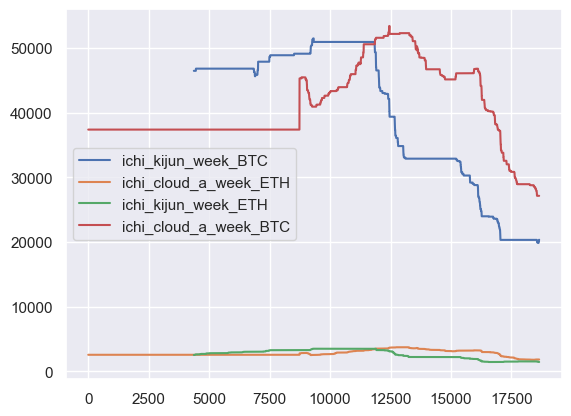

In [4]:
df_feat_raw[["ichi_kijun_week_BTC"   ,    
"ichi_cloud_a_week_ETH"   ,  
"ichi_kijun_week_ETH"    ,   
"ichi_cloud_a_week_BTC"]].plot()

### drop nan

In [5]:
print(df_feat_raw.shape)
df_feat = df_feat_raw.dropna(subset=["ichi_kijun_week_ETH"]).copy()
df_feat.reset_index(inplace=True)
df_feat.shape

(18648, 135)


(14281, 136)

In [6]:
nb_missing = get_missing(df_feat)

missing data : 
Consensus_num       14210
delta_event_real    14210
delta_event_pred    14210
Previous_num        14210
Actual_num          14210
Event               14210
Date                14210
Previous            14210
Consensus           14210
Actual              14210
Country             14210
Time (ET)           14210
keep                14210
date                14210
dtype: int64

on 14281 samples


## Features Selection

### Propotional to the Price

In [7]:
list_col = df_feat.columns.to_list()
list_col

['index',
 'Time',
 'Open_ETH',
 'High_ETH',
 'Low_ETH',
 'Close_ETH',
 'Volume_ETH',
 'date_ETH',
 'ichi_cloud_a_ETH',
 'ichi_cloud_b_ETH',
 'ichi_kijun_ETH',
 'ichi_tenkan_ETH',
 'ichi_cloud_a_day_ETH',
 'ichi_cloud_b_day_ETH',
 'ichi_kijun_day_ETH',
 'ichi_tenkan_day_ETH',
 'ichi_cloud_a_week_ETH',
 'ichi_cloud_b_week_ETH',
 'ichi_kijun_week_ETH',
 'ichi_tenkan_week_ETH',
 'rsi_h_ETH',
 'rsi_d_ETH',
 'rsi_w_ETH',
 'max_high_h_ETH',
 'min_low_h_ETH',
 'atr_h_ETH',
 'chop_h_ETH',
 'max_high_d_ETH',
 'min_low_d_ETH',
 'atr_d_ETH',
 'chop_d_ETH',
 'max_high_w_ETH',
 'min_low_w_ETH',
 'atr_w_ETH',
 'chop_w_ETH',
 'vwap_h_ETH',
 'vwap_d_ETH',
 'vwap_w_ETH',
 'vwap_m_ETH',
 'vwap_3m_ETH',
 'vwap_6m_ETH',
 'vwap_y_ETH',
 'vwap_all_ETH',
 'vwap_z_score_ETH',
 'nupl_ETH',
 'fear_greed',
 'fear_greed_class',
 'fvx',
 'spx',
 'dxy',
 'supply_ETH',
 'act_addr_ETH',
 'market_dom_ETH',
 'hour',
 'hour_cos',
 'hour_sin',
 'weekday',
 'weekday_cos',
 'weekday_sin',
 'day',
 'days_in_month',
 'day_ra

In [8]:
list_col_ETH = [col for col in list_col if re.search("_ETH", col) is not None]
list_col_ETH

['Open_ETH',
 'High_ETH',
 'Low_ETH',
 'Close_ETH',
 'Volume_ETH',
 'date_ETH',
 'ichi_cloud_a_ETH',
 'ichi_cloud_b_ETH',
 'ichi_kijun_ETH',
 'ichi_tenkan_ETH',
 'ichi_cloud_a_day_ETH',
 'ichi_cloud_b_day_ETH',
 'ichi_kijun_day_ETH',
 'ichi_tenkan_day_ETH',
 'ichi_cloud_a_week_ETH',
 'ichi_cloud_b_week_ETH',
 'ichi_kijun_week_ETH',
 'ichi_tenkan_week_ETH',
 'rsi_h_ETH',
 'rsi_d_ETH',
 'rsi_w_ETH',
 'max_high_h_ETH',
 'min_low_h_ETH',
 'atr_h_ETH',
 'chop_h_ETH',
 'max_high_d_ETH',
 'min_low_d_ETH',
 'atr_d_ETH',
 'chop_d_ETH',
 'max_high_w_ETH',
 'min_low_w_ETH',
 'atr_w_ETH',
 'chop_w_ETH',
 'vwap_h_ETH',
 'vwap_d_ETH',
 'vwap_w_ETH',
 'vwap_m_ETH',
 'vwap_3m_ETH',
 'vwap_6m_ETH',
 'vwap_y_ETH',
 'vwap_all_ETH',
 'vwap_z_score_ETH',
 'nupl_ETH',
 'supply_ETH',
 'act_addr_ETH',
 'market_dom_ETH']

In [9]:
df_feat[list_col_ETH]

,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,date_ETH,ichi_cloud_a_ETH,ichi_cloud_b_ETH,ichi_kijun_ETH,ichi_tenkan_ETH,...,vwap_m_ETH,vwap_3m_ETH,vwap_6m_ETH,vwap_y_ETH,vwap_all_ETH,vwap_z_score_ETH,nupl_ETH,supply_ETH,act_addr_ETH,market_dom_ETH
0,2128.88,2135.07,2104.88,2106.41,20782.46239,2021-07-01 23:00:00,2188.2400,2174.775,2177.520,2107.755,...,1997.853156,1997.853156,1997.853156,1997.853156,1997.853156,0.155010,0.051536,1.166930e+08,527404.0,17.768278
1,2106.41,2136.00,2096.00,2135.18,22888.95033,2021-07-02 00:00:00,2188.2400,2174.775,2177.520,2107.755,...,1997.866014,1997.866014,1997.866014,1997.866014,1997.866014,0.196095,0.064310,1.167075e+08,501748.0,17.533440
2,2135.50,2139.00,2084.04,2087.34,28744.05686,2021-07-02 01:00:00,2188.2400,2174.775,2174.525,2107.755,...,1997.879702,1997.879702,1997.879702,1997.879702,1997.879702,0.127771,0.042859,1.167075e+08,501748.0,17.533440
3,2087.45,2103.64,2082.00,2094.46,18099.07919,2021-07-02 02:00:00,2189.4400,2174.775,2170.405,2107.755,...,1997.887496,1997.887496,1997.887496,1997.887496,1997.887496,0.137944,0.046109,1.167075e+08,501748.0,17.533440
4,2094.45,2095.74,2033.96,2041.20,47236.16323,2021-07-02 03:00:00,2192.3925,2174.775,2149.315,2086.980,...,1997.900078,1997.900078,1997.900078,1997.900078,1997.900078,0.061857,0.021213,1.167075e+08,501748.0,17.533440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,1716.68,1718.19,1706.83,1710.85,15820.92910,2023-02-16 19:00:00,1566.8975,1527.800,1660.235,1704.105,...,1481.423425,2192.241093,2112.034508,1684.967117,2112.034508,-0.408219,-0.234494,1.204963e+08,434425.0,18.136519
14277,1710.85,1711.11,1680.00,1685.00,48306.90610,2023-02-16 20:00:00,1570.3025,1529.095,1665.695,1704.105,...,1481.436143,2192.149994,2112.000771,1684.877674,2112.000771,-0.434494,-0.253413,1.204963e+08,434425.0,18.136519
14278,1684.99,1685.00,1667.54,1683.09,29334.82390,2023-02-16 21:00:00,1588.7700,1545.625,1683.610,1704.105,...,1481.464607,2192.067967,2111.979628,1684.831222,2111.979628,-0.436423,-0.254823,1.204963e+08,434425.0,18.136519
14279,1683.09,1684.89,1641.40,1646.09,43934.43760,2023-02-16 22:00:00,1617.3525,1571.110,1692.185,1692.185,...,1481.493730,2191.971223,2111.946426,1684.796788,2111.946426,-0.474046,-0.283008,1.204963e+08,434425.0,18.136519


In [10]:
list_price_dep_ETH = [
    "Close_ETH",
    "Open_ETH",
    "High_ETH",
    "Low_ETH",
    'ichi_cloud_a_ETH',
    'ichi_cloud_b_ETH',
    'ichi_kijun_ETH',
    'ichi_tenkan_ETH',
    'ichi_cloud_a_day_ETH',
    'ichi_cloud_b_day_ETH',
    'ichi_kijun_day_ETH',
    'ichi_tenkan_day_ETH',
    'ichi_cloud_a_week_ETH',
    'ichi_cloud_b_week_ETH',
    'ichi_kijun_week_ETH',
    'ichi_tenkan_week_ETH',
    'max_high_h_ETH',
    'min_low_h_ETH',
    'max_high_d_ETH',
    'min_low_d_ETH',
    'max_high_w_ETH',
    'min_low_w_ETH',
    'vwap_h_ETH',
    'vwap_d_ETH',
    'vwap_w_ETH',
    'vwap_m_ETH',
    'vwap_3m_ETH',
    'vwap_6m_ETH',
    'vwap_y_ETH',
    'vwap_all_ETH',
]


#    'max_high_h_ETH',
#    'ichi_tenkan_week_ETH',

In [11]:
list_col_BTC = [col for col in list_col if re.search("_BTC", col) is not None]
list_col_BTC

['Open_BTC',
 'High_BTC',
 'Low_BTC',
 'Close_BTC',
 'Volume_BTC',
 'date_BTC',
 'ichi_cloud_a_BTC',
 'ichi_cloud_b_BTC',
 'ichi_kijun_BTC',
 'ichi_tenkan_BTC',
 'ichi_cloud_a_day_BTC',
 'ichi_cloud_b_day_BTC',
 'ichi_kijun_day_BTC',
 'ichi_tenkan_day_BTC',
 'ichi_cloud_a_week_BTC',
 'ichi_cloud_b_week_BTC',
 'ichi_kijun_week_BTC',
 'ichi_tenkan_week_BTC',
 'rsi_h_BTC',
 'rsi_d_BTC',
 'rsi_w_BTC',
 'max_high_h_BTC',
 'min_low_h_BTC',
 'atr_h_BTC',
 'chop_h_BTC',
 'max_high_d_BTC',
 'min_low_d_BTC',
 'atr_d_BTC',
 'chop_d_BTC',
 'max_high_w_BTC',
 'min_low_w_BTC',
 'atr_w_BTC',
 'chop_w_BTC',
 'vwap_h_BTC',
 'vwap_d_BTC',
 'vwap_w_BTC',
 'vwap_m_BTC',
 'vwap_3m_BTC',
 'vwap_6m_BTC',
 'vwap_y_BTC',
 'vwap_all_BTC',
 'vwap_z_score_BTC',
 'nupl_BTC',
 'supply_BTC',
 'act_addr_BTC',
 'market_dom_BTC']

In [12]:
list_price_dep_BTC = [
    'Open_BTC',
    'High_BTC',
    'Low_BTC',
    'Close_BTC',
    'ichi_cloud_a_BTC',
    'ichi_cloud_b_BTC',
    'ichi_kijun_BTC',
    'ichi_tenkan_BTC',
    'ichi_cloud_a_day_BTC',
    'ichi_cloud_b_day_BTC',
    'ichi_kijun_day_BTC',
    'ichi_tenkan_day_BTC',
    'ichi_cloud_a_week_BTC',
    'ichi_cloud_b_week_BTC',
    'ichi_kijun_week_BTC',
    'ichi_tenkan_week_BTC',
    'max_high_h_BTC',
    'min_low_h_BTC',
    'max_high_d_BTC',
    'min_low_d_BTC',
    'max_high_w_BTC',
    'min_low_w_BTC',
    'vwap_h_BTC',
    'vwap_d_BTC',
    'vwap_w_BTC',
    'vwap_m_BTC',
    'vwap_3m_BTC',
    'vwap_6m_BTC',
    'vwap_y_BTC',
    'vwap_all_BTC',
    'vwap_z_score_BTC',
]

In [13]:
list_col_BNB = [col for col in list_col if re.search("_BNB", col) is not None]
list_col_BNB

['Open_BNB', 'High_BNB', 'Low_BNB', 'Close_BNB', 'Volume_BNB', 'date_BNB']

In [14]:
list_price_dep_BNB = ['Open_BNB', 'High_BNB', 'Low_BNB', 'Close_BNB']

### Not proportional to the Price 

In [15]:
set(list_col) - set(list_price_dep_ETH) - set(list_price_dep_BTC) - set(list_price_dep_BNB)

{'Actual',
 'Actual_num',
 'Consensus',
 'Consensus_num',
 'Country',
 'Date',
 'Event',
 'Previous',
 'Previous_num',
 'Time',
 'Time (ET)',
 'Volume_BNB',
 'Volume_BTC',
 'Volume_ETH',
 'act_addr_BTC',
 'act_addr_ETH',
 'atr_d_BTC',
 'atr_d_ETH',
 'atr_h_BTC',
 'atr_h_ETH',
 'atr_w_BTC',
 'atr_w_ETH',
 'chop_d_BTC',
 'chop_d_ETH',
 'chop_h_BTC',
 'chop_h_ETH',
 'chop_w_BTC',
 'chop_w_ETH',
 'date',
 'date_BNB',
 'date_BTC',
 'date_ETH',
 'day',
 'day_in_month_cos',
 'day_in_month_sin',
 'day_off',
 'day_ratio',
 'days_in_month',
 'delta_event_pred',
 'delta_event_real',
 'dxy',
 'event_pred',
 'event_real',
 'fear_greed',
 'fear_greed_class',
 'fvx',
 'hour',
 'hour_cos',
 'hour_sin',
 'index',
 'keep',
 'market_dom_BTC',
 'market_dom_ETH',
 'month',
 'month_cos',
 'month_sin',
 'nupl_BTC',
 'nupl_ETH',
 'rsi_d_BTC',
 'rsi_d_ETH',
 'rsi_h_BTC',
 'rsi_h_ETH',
 'rsi_w_BTC',
 'rsi_w_ETH',
 'spx',
 'supply_BTC',
 'supply_ETH',
 'vwap_z_score_ETH',
 'weekday',
 'weekday_cos',
 'weekday_si

In [16]:
list_col_other = [
    'Volume_BNB',
    'Volume_BTC',
    'Volume_ETH',
    'chop_d_BTC',
    'chop_d_ETH',
    'chop_h_BTC',
    'chop_h_ETH',
    'chop_w_BTC',
    'chop_w_ETH',
    'rsi_d_BTC',
    'rsi_d_ETH',
    'rsi_h_BTC',
    'rsi_h_ETH',
    'rsi_w_BTC',
    'rsi_w_ETH',
    'vwap_z_score_ETH',
    'dxy',
    'spx',
    'fvx',
    'act_addr_BTC',
    'act_addr_ETH',
    'market_dom_BTC',
    'market_dom_ETH',
    'nupl_BTC',
    'nupl_ETH',
    'fear_greed',
    'supply_BTC',
    'supply_ETH',
    'hour_cos',
    'hour_sin',
    'weekday_cos',
    'weekday_sin',
    'day_in_month_cos',
    'day_in_month_sin',
    'month_cos',
    'month_sin',
    'day_off',
    'event_pred',
    'event_real',
]

### Final selection

In [17]:
list_col_select_simple = [
    "Close_ETH",
    "Open_ETH",
    "High_ETH",
    "Low_ETH",
]

list_col_select_global = (
    list_price_dep_ETH +
    list_price_dep_BTC +
    list_price_dep_BNB +    
    list_col_other
)


# selection
list_col_select = list_col_select_global
print("num features : ", len(list_col_select))

num features :  104


In [18]:
list_col_select

['Close_ETH',
 'Open_ETH',
 'High_ETH',
 'Low_ETH',
 'ichi_cloud_a_ETH',
 'ichi_cloud_b_ETH',
 'ichi_kijun_ETH',
 'ichi_tenkan_ETH',
 'ichi_cloud_a_day_ETH',
 'ichi_cloud_b_day_ETH',
 'ichi_kijun_day_ETH',
 'ichi_tenkan_day_ETH',
 'ichi_cloud_a_week_ETH',
 'ichi_cloud_b_week_ETH',
 'ichi_kijun_week_ETH',
 'ichi_tenkan_week_ETH',
 'max_high_h_ETH',
 'min_low_h_ETH',
 'max_high_d_ETH',
 'min_low_d_ETH',
 'max_high_w_ETH',
 'min_low_w_ETH',
 'vwap_h_ETH',
 'vwap_d_ETH',
 'vwap_w_ETH',
 'vwap_m_ETH',
 'vwap_3m_ETH',
 'vwap_6m_ETH',
 'vwap_y_ETH',
 'vwap_all_ETH',
 'Open_BTC',
 'High_BTC',
 'Low_BTC',
 'Close_BTC',
 'ichi_cloud_a_BTC',
 'ichi_cloud_b_BTC',
 'ichi_kijun_BTC',
 'ichi_tenkan_BTC',
 'ichi_cloud_a_day_BTC',
 'ichi_cloud_b_day_BTC',
 'ichi_kijun_day_BTC',
 'ichi_tenkan_day_BTC',
 'ichi_cloud_a_week_BTC',
 'ichi_cloud_b_week_BTC',
 'ichi_kijun_week_BTC',
 'ichi_tenkan_week_BTC',
 'max_high_h_BTC',
 'min_low_h_BTC',
 'max_high_d_BTC',
 'min_low_d_BTC',
 'max_high_w_BTC',
 'min_low_

In [19]:
df_feat["event_real"].describe()

count    14281.000000
mean        -0.000630
std          0.049503
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: event_real, dtype: float64

In [20]:
df_feat["event_real"].value_counts()

 0.0    14246
-1.0       22
 1.0       13
Name: event_real, dtype: int64

## Features preparation

df_feat [selected features]   
--> X_train_raw, X_test_raw, y_train_raw, y_test_raw  
--> X_train (with prices ratio of ETH Close price at last lag) <-- used by autoencoder 


X [nb samples, nb lags, nb features]


In [21]:
df_feat.shape[0]

14281

In [22]:
TRAIN_SPLIT = round(0.8 * df_feat.shape[0])
TRAIN_SPLIT

11425

In [23]:
bol_train = [True if I <= TRAIN_SPLIT else False \
                       for I in range(df_feat.shape[0])]
df_feat["train"] = bol_train
df_feat

,index,Time,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,date_ETH,ichi_cloud_a_ETH,ichi_cloud_b_ETH,...,Actual_num,Consensus_num,Previous_num,delta_event_pred,event_pred,delta_event_real,event_real,day_off,date,train
0,4367,1625180400000,2128.88,2135.07,2104.88,2106.41,20782.46239,2021-07-01 23:00:00,2188.2400,2174.775,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,True
1,4368,1625184000000,2106.41,2136.00,2096.00,2135.18,22888.95033,2021-07-02 00:00:00,2188.2400,2174.775,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,True
2,4369,1625187600000,2135.50,2139.00,2084.04,2087.34,28744.05686,2021-07-02 01:00:00,2188.2400,2174.775,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,True
3,4370,1625191200000,2087.45,2103.64,2082.00,2094.46,18099.07919,2021-07-02 02:00:00,2189.4400,2174.775,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,True
4,4371,1625194800000,2094.45,2095.74,2033.96,2041.20,47236.16323,2021-07-02 03:00:00,2192.3925,2174.775,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,18643,1676574000000,1716.68,1718.19,1706.83,1710.85,15820.92910,2023-02-16 19:00:00,1566.8975,1527.800,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,False
14277,18644,1676577600000,1710.85,1711.11,1680.00,1685.00,48306.90610,2023-02-16 20:00:00,1570.3025,1529.095,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,False
14278,18645,1676581200000,1684.99,1685.00,1667.54,1683.09,29334.82390,2023-02-16 21:00:00,1588.7700,1545.625,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,False
14279,18646,1676584800000,1683.09,1684.89,1641.40,1646.09,43934.43760,2023-02-16 22:00:00,1617.3525,1571.110,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,False


In [24]:
def gen_sequence(id_df, seq_length, len_pred, seq_cols, i_price_dep=None):

    data_matrix = id_df[seq_cols].values # data of selected col
    num_elements = data_matrix.shape[0] # nb samples

    for start, stop in zip(
            range(0, num_elements - seq_length - len_pred), 
            range(seq_length, num_elements - len_pred)
        ):
            out_matrix = data_matrix[start:stop, :].copy()
            if i_price_dep is not None:
                out_matrix[:, i_price_dep] = (
                    out_matrix[:, i_price_dep] / out_matrix[-1, 0]
                )
            yield out_matrix

def gen_labels(id_df, seq_length, len_pred, label, divide_price=False):

    data_matrix = id_df[label].values 
    num_elements = data_matrix.shape[0]

    for start, stop in zip(
            range(seq_length, num_elements - len_pred), 
            range(seq_length + len_pred, num_elements)
        ):
        out_matrix = data_matrix[start:stop, :].copy()
        if divide_price:
            out_matrix = out_matrix / data_matrix[start-1, 0]
        yield np.swapaxes(out_matrix,0,1).squeeze()

In [25]:
x = np.array([[1,2,3]])
x = np.swapaxes(x,0,1)
x = np.swapaxes(x,0,1).squeeze()
x

array([1, 2, 3])

In [26]:
i_col_price_dep = [
    (
        (col in list_price_dep_ETH) 
        or (col in list_price_dep_BTC) 
        or (col in list_price_dep_BNB)
    ) 
    for col in list_col_select ]

In [27]:
X_train, X_test = [], []
y_train, y_test = [], []

for is_train, _df in df_feat.groupby("train"):

    for seq in gen_sequence(
        _df, 
        PAST_HISTORY,
        FUTURE_TARGET,
        list_col_select,
        i_col_price_dep
        ):
            if is_train:
                X_train.append(seq)
            else:
                X_test.append(seq)
    
    for seq_y in gen_labels(_df, PAST_HISTORY, FUTURE_TARGET, ['Close_ETH'], divide_price=True):

        if is_train:
            y_train.append(seq_y)
        else:
            y_test.append(seq_y)    

X_train = np.asarray(X_train)
y_train = np.array(y_train)
X_test = np.asarray(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11366, 48, 104) (11366, 12)
(2795, 48, 104) (2795, 12)


In [28]:
seq_y

array([0.99436767, 0.99866117, 1.00499369, 1.00014619, 0.99303653,
       0.98858915, 0.99173617, 0.98839679, 0.9868502 , 0.98859684,
       0.98716568, 0.98686559])

In [29]:
y_train

array([[1.00967057, 1.00048512, 0.99583798, ..., 1.05636408, 1.05341712,
        1.05926571],
       [0.99090252, 0.98629989, 0.99140095, ..., 1.04332754, 1.04912011,
        1.04669082],
       [0.99535512, 1.00050301, 1.00135948, ..., 1.05875209, 1.0563005 ,
        1.0455289 ],
       ...,
       [1.00210599, 1.00257656, 0.99692972, ..., 0.99094345, 0.98939289,
        0.99114403],
       [1.00046958, 0.99483461, 0.99913012, ..., 0.98731361, 0.98906107,
        0.98762923],
       [0.99436767, 0.99866117, 1.00499369, ..., 0.98859684, 0.98716568,
        0.98686559]])

In [30]:
seq_y

array([0.99436767, 0.99866117, 1.00499369, 1.00014619, 0.99303653,
       0.98858915, 0.99173617, 0.98839679, 0.9868502 , 0.98859684,
       0.98716568, 0.98686559])

In [31]:
y_train

array([[1.00967057, 1.00048512, 0.99583798, ..., 1.05636408, 1.05341712,
        1.05926571],
       [0.99090252, 0.98629989, 0.99140095, ..., 1.04332754, 1.04912011,
        1.04669082],
       [0.99535512, 1.00050301, 1.00135948, ..., 1.05875209, 1.0563005 ,
        1.0455289 ],
       ...,
       [1.00210599, 1.00257656, 0.99692972, ..., 0.99094345, 0.98939289,
        0.99114403],
       [1.00046958, 0.99483461, 0.99913012, ..., 0.98731361, 0.98906107,
        0.98762923],
       [0.99436767, 0.99866117, 1.00499369, ..., 0.98859684, 0.98716568,
        0.98686559]])

In [32]:
df_feat["Close_ETH"].iloc[PAST_HISTORY] / df_feat["Close_ETH"].iloc[PAST_HISTORY-1] == y_train[0,0]

True

In [33]:
X_train.shape

(11366, 48, 104)

In [34]:
X_train_raw, X_test_raw = [], []
y_train_raw, y_test_raw = [], []

for is_train, _df in df_feat.groupby("train"):

    for seq in gen_sequence(
        _df, 
        PAST_HISTORY,
        FUTURE_TARGET,
        list_col_select,
        ):
            if is_train:
                X_train_raw.append(seq)
            else:
                X_test_raw.append(seq)
    
    for seq_y in gen_labels(_df, PAST_HISTORY, FUTURE_TARGET, ['Close_ETH']):

        if is_train:
            y_train_raw.append(seq_y)
        else:
            y_test_raw.append(seq_y)    

X_train_raw = np.asarray(X_train_raw)
y_train_raw = np.array(y_train_raw)
X_test_raw = np.asarray(X_test_raw)
y_test_raw = np.array(y_test_raw)

print(X_train_raw.shape, y_train_raw.shape)
print(X_test_raw.shape, y_test_raw.shape)

(11366, 48, 104) (11366, 12)
(2795, 48, 104) (2795, 12)


## Standardization

In [35]:
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
X_test_sca = scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)

In [36]:
scaler_y = StandardScaler()
y_train_sca = scaler_y.fit_transform(y_train.reshape(-1,y_train.shape[-1])).reshape(y_train.shape)
y_test_sca = scaler_y.transform(y_test.reshape(-1,y_test.shape[-1])).reshape(y_test.shape)

In [37]:
y_train

array([[1.00967057, 1.00048512, 0.99583798, ..., 1.05636408, 1.05341712,
        1.05926571],
       [0.99090252, 0.98629989, 0.99140095, ..., 1.04332754, 1.04912011,
        1.04669082],
       [0.99535512, 1.00050301, 1.00135948, ..., 1.05875209, 1.0563005 ,
        1.0455289 ],
       ...,
       [1.00210599, 1.00257656, 0.99692972, ..., 0.99094345, 0.98939289,
        0.99114403],
       [1.00046958, 0.99483461, 0.99913012, ..., 0.98731361, 0.98906107,
        0.98762923],
       [0.99436767, 0.99866117, 1.00499369, ..., 0.98859684, 0.98716568,
        0.98686559]])

In [38]:
np.mean(y_train_sca)

-1.7021257742216062e-14

In [39]:
np.std(y_train_sca)

0.9999999999999996

### Check unscaling

In [40]:
df_feat[list_col_select].head(10)

,Close_ETH,Open_ETH,High_ETH,Low_ETH,ichi_cloud_a_ETH,ichi_cloud_b_ETH,ichi_kijun_ETH,ichi_tenkan_ETH,ichi_cloud_a_day_ETH,ichi_cloud_b_day_ETH,...,hour_sin,weekday_cos,weekday_sin,day_in_month_cos,day_in_month_sin,month_cos,month_sin,day_off,event_pred,event_real
0,2106.41,2128.88,2135.07,2104.88,2188.2400,2174.775,2177.520,2107.755,2793.485,3050.73,...,-0.258819,-0.900969,0.433884,0.979530,0.201299,-0.866025,-0.5,0.0,0.0,0.0
1,2135.18,2106.41,2136.00,2096.00,2188.2400,2174.775,2177.520,2107.755,2793.485,3050.73,...,0.000000,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
2,2087.34,2135.50,2139.00,2084.04,2188.2400,2174.775,2174.525,2107.755,2793.485,3050.73,...,0.258819,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
3,2094.46,2087.45,2103.64,2082.00,2189.4400,2174.775,2170.405,2107.755,2793.485,3050.73,...,0.500000,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
4,2041.20,2094.45,2095.74,2033.96,2192.3925,2174.775,2149.315,2086.980,2793.485,3050.73,...,0.707107,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
5,2054.86,2041.19,2058.85,2035.61,2203.5250,2174.775,2134.385,2086.980,2793.485,3050.73,...,0.866025,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
6,2032.84,2054.86,2058.77,2023.41,2211.6375,2180.675,2129.110,2081.705,2793.485,3050.73,...,0.965926,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
7,2034.03,2032.92,2041.86,2018.50,2210.8925,2185.445,2126.655,2078.750,2793.485,3050.73,...,1.000000,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
8,2061.49,2034.35,2070.00,2028.98,2210.8925,2185.445,2126.655,2078.750,2793.485,3050.73,...,0.965926,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0
9,2060.50,2061.49,2080.46,2051.48,2203.1750,2186.930,2094.295,2078.750,2793.485,3050.73,...,0.866025,-0.900969,-0.433884,0.918958,0.394356,-0.866025,-0.5,0.0,0.0,0.0


In [41]:
df_feat["Close_ETH"].iloc[0:10]

0    2106.41
1    2135.18
2    2087.34
3    2094.46
4    2041.20
5    2054.86
6    2032.84
7    2034.03
8    2061.49
9    2060.50
Name: Close_ETH, dtype: float64

In [42]:
X_train_raw[0,:10, 0] == df_feat["Close_ETH"].iloc[0:10].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
# Check unscaling
# X [nb samples, nb lags, nb features]
# X_train_sca -> unscaler -> X_train -> multiply by  Close price last lag
X_train_unscaled = scaler.inverse_transform(X_train_sca.reshape(-1,X_train_sca.shape[-1])).reshape(X_train_sca.shape)
print("X train unscaled : ", X_train_unscaled[:,-1,0])
print("X train          : ", X_train[:,-1,0])
# Close price ?
if np.testing.assert_array_almost_equal(X_train[0,:10, 0] * X_train_raw[0,-1, 0],
                                     df_feat["Close_ETH"].iloc[0:10].values, decimal=5) is None:
    print("Almost equal")
print("unscaled to raw: ", X_train[0,:10, 0] * X_train_raw[0,-1, 0])
print("X_train_raw:     ", X_train_raw[0,:10, 0])

X train unscaled :  [1. 1. 1. ... 1. 1. 1.]
X train          :  [1. 1. 1. ... 1. 1. 1.]
Almost equal
unscaled to raw:  [2106.41 2135.18 2087.34 2094.46 2041.2  2054.86 2032.84 2034.03 2061.49
 2060.5 ]
X_train_raw:      [2106.41 2135.18 2087.34 2094.46 2041.2  2054.86 2032.84 2034.03 2061.49
 2060.5 ]


In [44]:
# Check unscaling
# X  _raw : df feat raw data
# X : price normalized
# X  _sca : standardized use by model
# X      _pred : predict
# X [nb samples, nb lags, nb features]
# X_train_sca -> unscaler -> X_train -> multiply by Close price last lag => X_raw
X_test_unscaled = scaler.inverse_transform(X_test_sca.reshape(-1,X_test_sca.shape[-1])).reshape(X_test_sca.shape)
print("X test unscaled: ", X_test_unscaled[:,-1,0])
print("X test         : ", X_test[:,-1,0])
# Close price ?
#if np.testing.assert_array_almost_equal(X_test[0,:10, 0] * X_test_raw[0,-1, 0],
#                                     df_feat["Close_ETH"].iloc[0:10].values, decimal=5) is None:
#    print("Almost equal")
print("unscaled to raw: ", X_test[0,:10, 0] * X_test_raw[0,-1, 0])
print("X_test_raw     : ", X_test_raw[0,:10, 0])

X test unscaled:  [1. 1. 1. ... 1. 1. 1.]
X test         :  [1. 1. 1. ... 1. 1. 1.]
unscaled to raw:  [1286.57 1289.79 1287.54 1288.28 1288.02 1285.44 1284.59 1278.12 1280.39
 1281.49]
X_test_raw     :  [1286.57 1289.79 1287.54 1288.28 1288.02 1285.44 1284.59 1278.12 1280.39
 1281.49]


## Correlation

To simplify, we try to find correlation between all features X t-0 and target y t+1

In [45]:
X_train_sca.shape

(11366, 48, 104)

In [46]:
X_train_sca[:,-1,:].shape

(11366, 104)

In [47]:
y_train_sca[:,0][:, np.newaxis]

array([[ 1.05555458],
       [-0.99194817],
       [-0.50619143],
       ...,
       [ 0.23029596],
       [ 0.05177136],
       [-0.61391706]])

In [48]:
np.hstack((X_train_sca[:,-1,:], y_train_sca[:,0][:, np.newaxis])).shape

(11366, 105)

In [49]:
list_col_select

['Close_ETH',
 'Open_ETH',
 'High_ETH',
 'Low_ETH',
 'ichi_cloud_a_ETH',
 'ichi_cloud_b_ETH',
 'ichi_kijun_ETH',
 'ichi_tenkan_ETH',
 'ichi_cloud_a_day_ETH',
 'ichi_cloud_b_day_ETH',
 'ichi_kijun_day_ETH',
 'ichi_tenkan_day_ETH',
 'ichi_cloud_a_week_ETH',
 'ichi_cloud_b_week_ETH',
 'ichi_kijun_week_ETH',
 'ichi_tenkan_week_ETH',
 'max_high_h_ETH',
 'min_low_h_ETH',
 'max_high_d_ETH',
 'min_low_d_ETH',
 'max_high_w_ETH',
 'min_low_w_ETH',
 'vwap_h_ETH',
 'vwap_d_ETH',
 'vwap_w_ETH',
 'vwap_m_ETH',
 'vwap_3m_ETH',
 'vwap_6m_ETH',
 'vwap_y_ETH',
 'vwap_all_ETH',
 'Open_BTC',
 'High_BTC',
 'Low_BTC',
 'Close_BTC',
 'ichi_cloud_a_BTC',
 'ichi_cloud_b_BTC',
 'ichi_kijun_BTC',
 'ichi_tenkan_BTC',
 'ichi_cloud_a_day_BTC',
 'ichi_cloud_b_day_BTC',
 'ichi_kijun_day_BTC',
 'ichi_tenkan_day_BTC',
 'ichi_cloud_a_week_BTC',
 'ichi_cloud_b_week_BTC',
 'ichi_kijun_week_BTC',
 'ichi_tenkan_week_BTC',
 'max_high_h_BTC',
 'min_low_h_BTC',
 'max_high_d_BTC',
 'min_low_d_BTC',
 'max_high_w_BTC',
 'min_low_

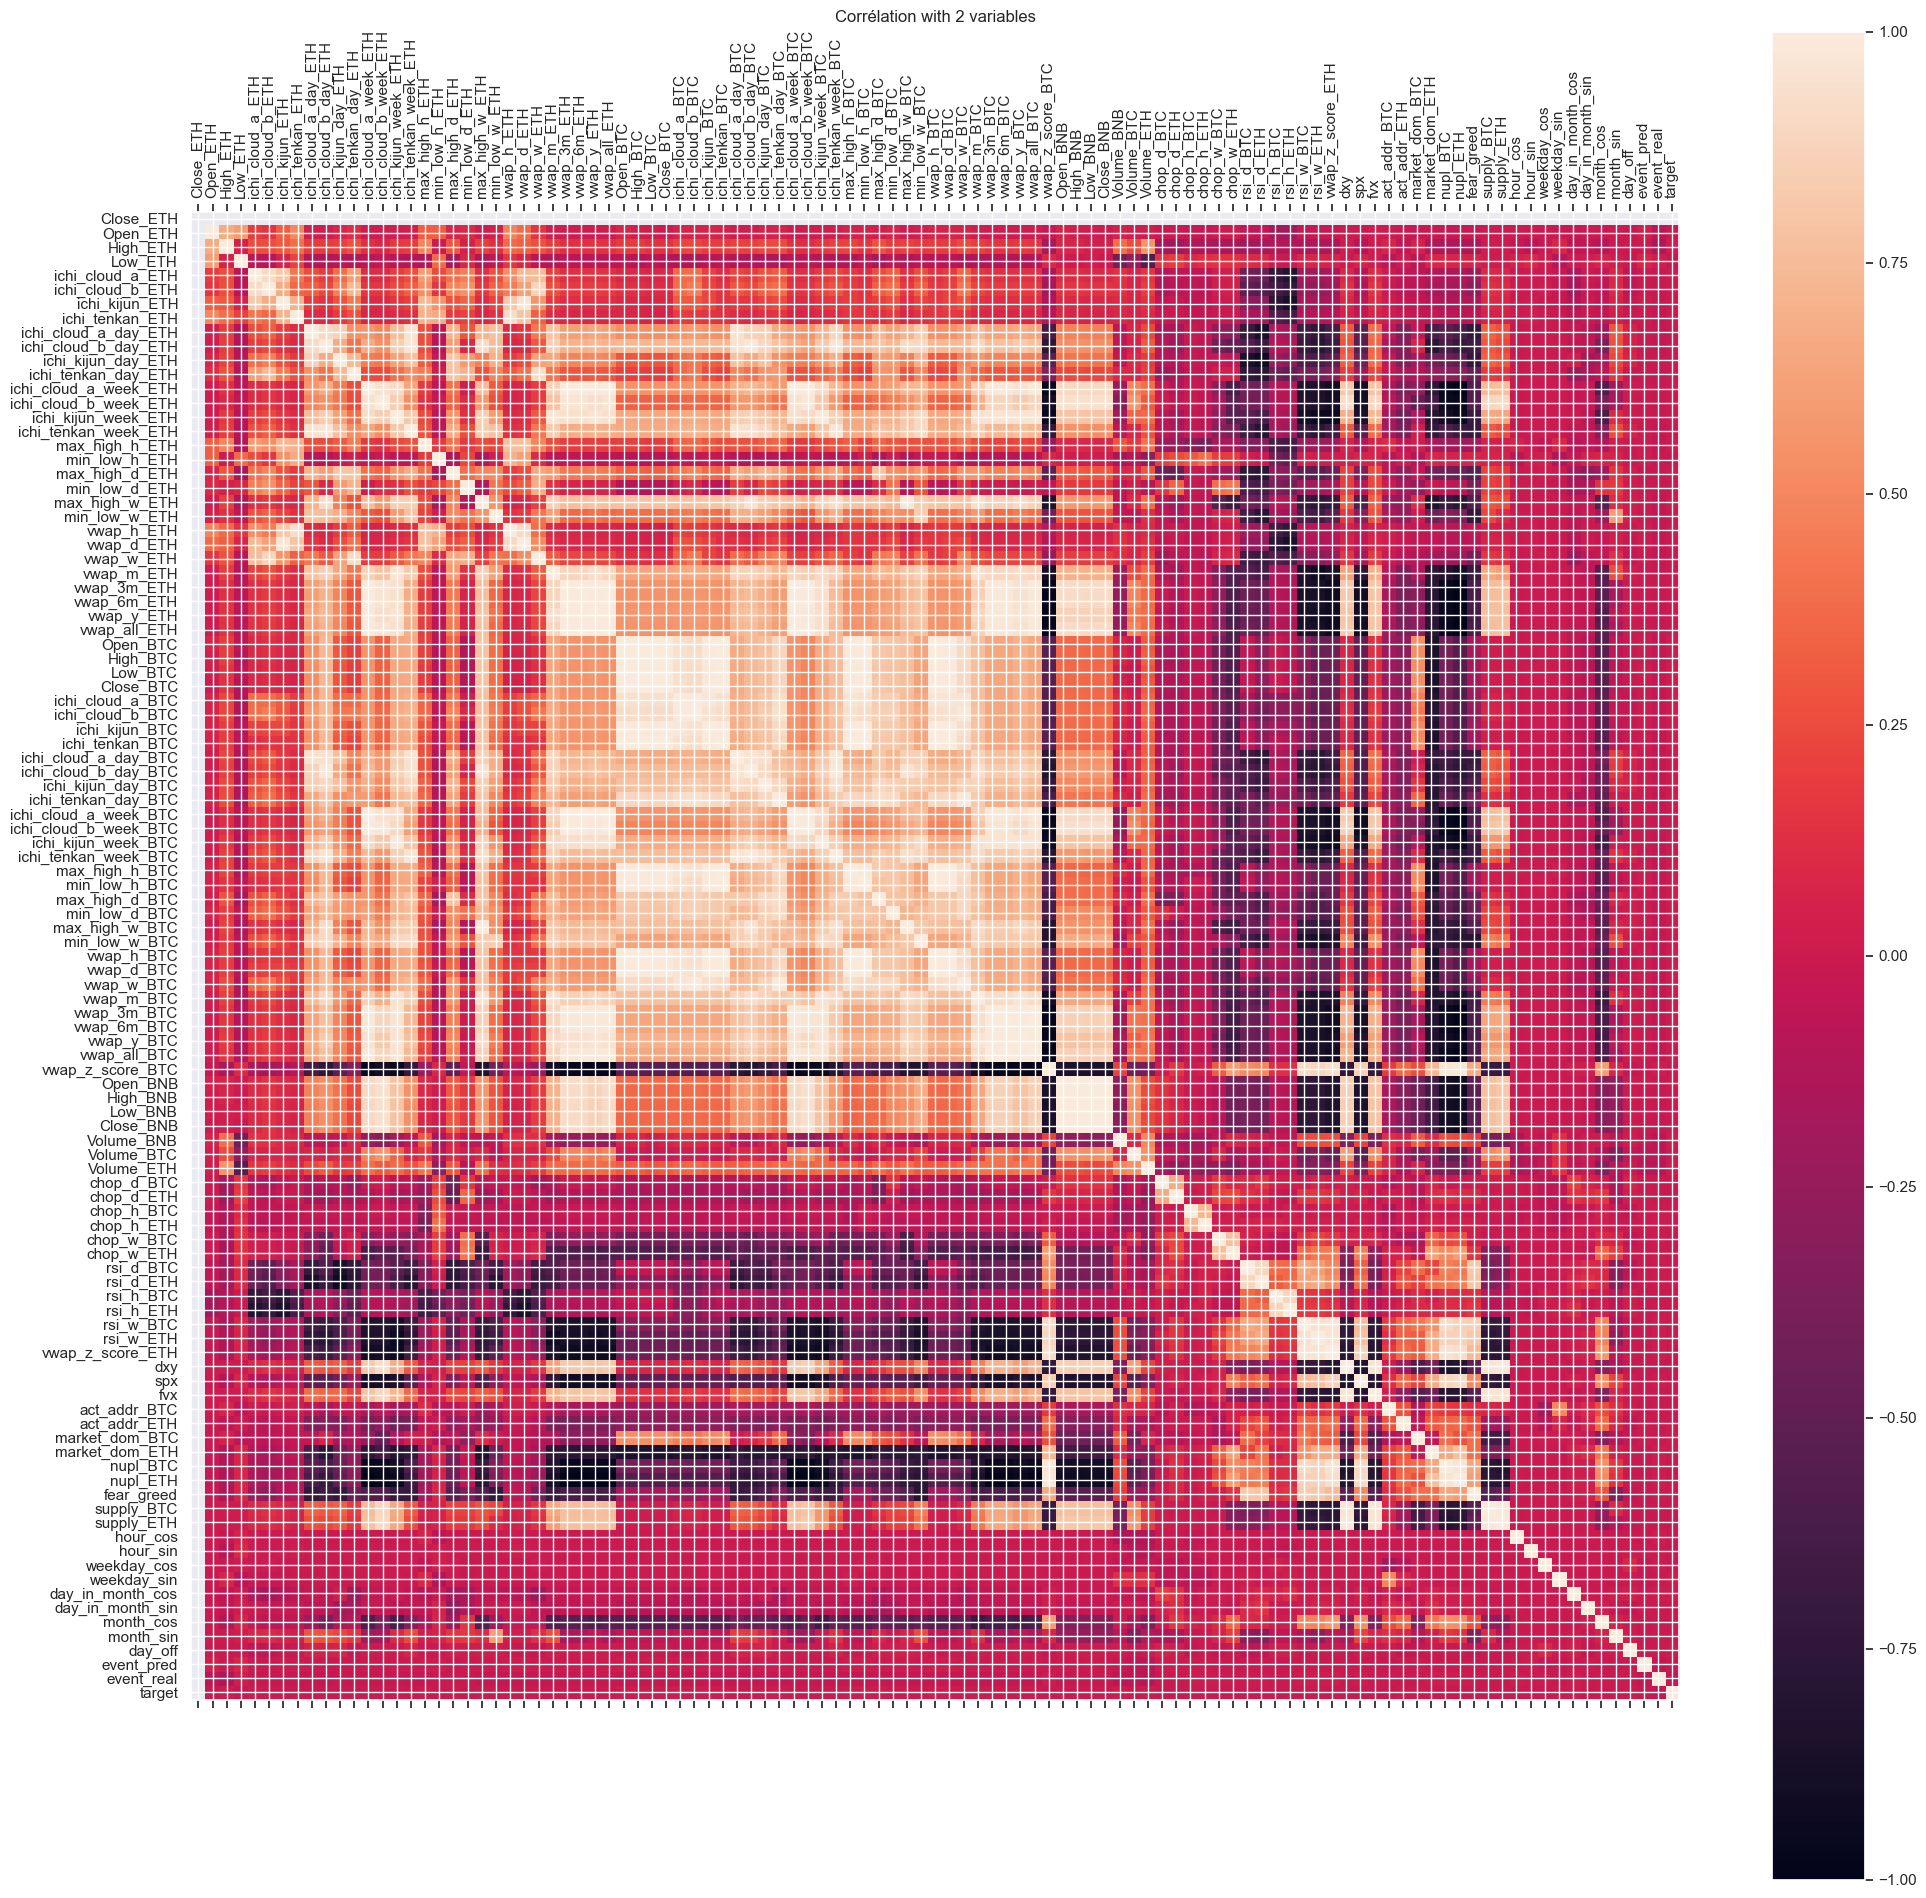

In [50]:

nb_plot = 104
# Créer un DataFrame pandas à partir des données d'entrée X et de la variable à prédire y
df = pd.DataFrame(np.hstack((X_train[:,-1,:nb_plot], y_train[:,0][:, np.newaxis])), 
    columns=list_col_select[:nb_plot] + ['target'])

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation
fig, ax = plt.subplots(figsize=(24, 24))
im = ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Corrélation with 2 variables')
fig.colorbar(im)
plt.show()


In [51]:
y_train

array([[1.00967057, 1.00048512, 0.99583798, ..., 1.05636408, 1.05341712,
        1.05926571],
       [0.99090252, 0.98629989, 0.99140095, ..., 1.04332754, 1.04912011,
        1.04669082],
       [0.99535512, 1.00050301, 1.00135948, ..., 1.05875209, 1.0563005 ,
        1.0455289 ],
       ...,
       [1.00210599, 1.00257656, 0.99692972, ..., 0.99094345, 0.98939289,
        0.99114403],
       [1.00046958, 0.99483461, 0.99913012, ..., 0.98731361, 0.98906107,
        0.98762923],
       [0.99436767, 0.99866117, 1.00499369, ..., 0.98859684, 0.98716568,
        0.98686559]])

In [52]:
y_train_sca

array([[ 1.05555458,  0.03806564, -0.26104008, ...,  1.96951457,
         1.78028466,  1.8901516 ],
       [-0.99194817, -1.05280832, -0.54028311, ...,  1.51457122,
         1.63729921,  1.4897404 ],
       [-0.50619143,  0.03944151,  0.08645343, ...,  2.05285023,
         1.87623093,  1.45274238],
       ...,
       [ 0.23029596,  0.19890251, -0.19233164, ..., -0.31350513,
        -0.35016053, -0.27898868],
       [ 0.05177136, -0.39647055, -0.05385041, ..., -0.44017779,
        -0.361202  , -0.39090726],
       [-0.61391706, -0.10219986,  0.31517137, ..., -0.39539616,
        -0.42427232, -0.41522312]])

## Autoencoder

### Model creation

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Définir les dimensions d'entrée
input_dim = X_train.shape[-1]

# Définir les dimensions réduites
encoding_dim = 12

# Définir l'encodeur
encoder_inputs = keras.Input(shape=(None, input_dim))
encoder = layers.LSTM(16, return_sequences=True)(encoder_inputs)
encoder = layers.LSTM(8, return_sequences=True)(encoder)
encoder = layers.Dropout(0.2)(encoder)
encoder_outputs = layers.Dense(encoding_dim)(encoder)
encoder_model = keras.Model(encoder_inputs, encoder_outputs)

# Définir le décodeur
decoder_inputs = keras.Input(shape=(None, encoding_dim))
decoder = layers.LSTM(8, return_sequences=True)(decoder_inputs)
decoder = layers.LSTM(16, return_sequences=True)(decoder)
decoder = layers.Dropout(0.2)(decoder)
decoder_outputs = layers.Dense(input_dim)(decoder)
decoder_model = keras.Model(decoder_inputs, decoder_outputs)

# Définir l'autoencodeur complet
autoencoder_inputs = keras.Input(shape=(None, input_dim))
encoded = encoder_model(autoencoder_inputs)
decoded = decoder_model(encoded)
autoencoder = keras.Model(autoencoder_inputs, decoded)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-02-19 21:16:16.787166: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 21:16:16.787548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [54]:
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 104)]       0         
                                                                 
 lstm (LSTM)                 (None, None, 16)          7744      
                                                                 
 lstm_1 (LSTM)               (None, None, 8)           800       
                                                                 
 dropout (Dropout)           (None, None, 8)           0         
                                                                 
 dense (Dense)               (None, None, 12)          108       
                                                                 
Total params: 8,652
Trainable params: 8,652
Non-trainable params: 0
_________________________________________________________________


In [55]:
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 12)]        0         
                                                                 
 lstm_2 (LSTM)               (None, None, 8)           672       
                                                                 
 lstm_3 (LSTM)               (None, None, 16)          1600      
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 dense_1 (Dense)             (None, None, 104)         1768      
                                                                 
Total params: 4,040
Trainable params: 4,040
Non-trainable params: 0
_________________________________________________________________


### Training

In [56]:
# Compiler l'autoencodeur
autoencoder.compile(optimizer="adam", loss="mse")

# earlystop 
es = EarlyStopping(patience=10, verbose=2, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)
# Entraîner l'autoencodeur
autoenc_step_history = autoencoder.fit(
    X_train_sca, X_train_sca, epochs=50, 
    batch_size=32, validation_split=0.05, verbose=1, callbacks=[es])
#autoenc_step_history = autoencoder.fit(X_train, X_train, epochs=, batch_size=32, validation_split=0.1, verbose=1)
# Réduire la dimension des données d'entrée avec l'encodeur
encoded_data = encoder_model.predict(X_test_sca)

Epoch 1/50


2023-02-19 21:16:18.122888: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 21:16:20.387291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:20.956712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:21.070680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:21.172901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:21.249652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:21.392011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

338/338 [==============================] - ETA: 0s - loss: 0.6400

2023-02-19 21:16:41.283615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:41.487476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:41.564853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:41.645391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:16:41.720532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 24s 61ms/step - loss: 0.6400 - val_loss: 0.7455
Epoch 2/50
338/338 [==============================] - 19s 56ms/step - loss: 0.4506 - val_loss: 0.4880
Epoch 3/50
338/338 [==============================] - 19s 56ms/step - loss: 0.3673 - val_loss: 0.4576
Epoch 4/50
338/338 [==============================] - 19s 58ms/step - loss: 0.3417 - val_loss: 0.4451
Epoch 5/50
338/338 [==============================] - 19s 57ms/step - loss: 0.3284 - val_loss: 0.4212
Epoch 6/50
338/338 [==============================] - 19s 56ms/step - loss: 0.3185 - val_loss: 0.4222
Epoch 7/50
338/338 [==============================] - 19s 56ms/step - loss: 0.3115 - val_loss: 0.4455
Epoch 8/50
338/338 [==============================] - 19s 56ms/step - loss: 0.3046 - val_loss: 0.4617
Epoch 9/50
338/338 [==============================] - 19s 55ms/step - loss: 0.2970 - val_loss: 0.4602
Epoch 10/50
338/338 [==============================] - 19s 57ms/step - loss: 0.2909 - val_los

2023-02-19 21:21:12.106456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:21:12.229755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 7/88 [=>............................] - ETA: 1s

2023-02-19 21:21:12.310774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 2s 18ms/step


In [57]:
X_train_sca_pred = autoencoder.predict(X_train_sca)
X_train_sca_pred.shape

2023-02-19 21:21:14.591825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:21:14.797547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:21:14.874718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:21:14.956241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/356 [..............................] - ETA: 14s 

2023-02-19 21:21:15.035507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - 12s 31ms/step


(11366, 48, 104)

### Results

In [58]:
def plot_train_history(history, title):
    """
    Plot train errors
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    fig = plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    ax = fig.gca()
    ax.set_xlabel("epoch[-]")
    plt.show()

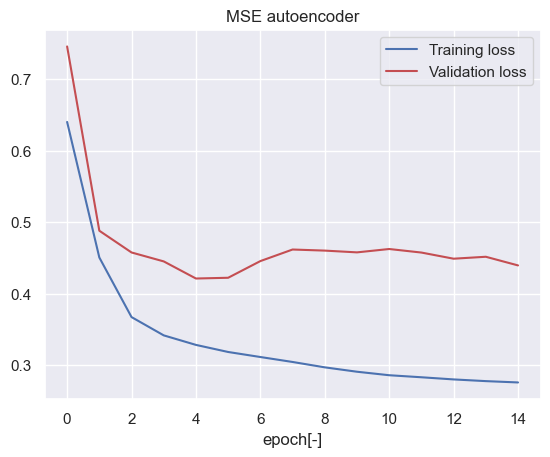

In [59]:
plot_train_history(autoenc_step_history,"MSE autoencoder")

In [60]:
X_train[:,-1,0]

array([1., 1., 1., ..., 1., 1., 1.])

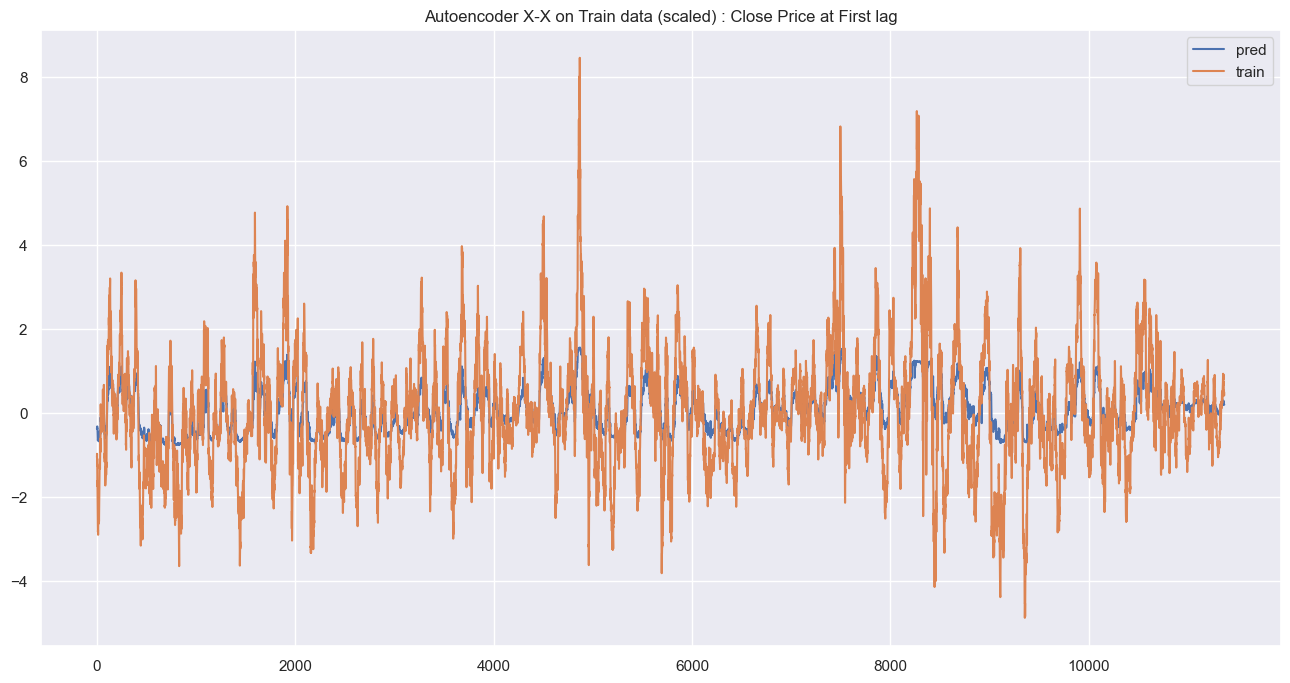

In [61]:
fig = plt.figure(figsize=(16, 8))
plt.title("Autoencoder X-X on Train data (scaled) : Close Price at First lag")
plt.plot(X_train_sca_pred[:,0,0], label="pred")
plt.plot(X_train_sca[:,0,0], label="train")
plt.legend(loc='upper right')

In [62]:
# X_train_raw
# X_train[0,:10, 0] * X_train_raw[0,-1, 0]
# [samples, lags, features]
print(X_train[:,0, 0].shape)
print(X_train_raw[:,-1, 0].shape)
print(X_train[:,0, 0] * X_train_raw[:,-1, 0])
print(df_feat["Close_ETH"].values[:3])

(11366,)
(11366,)
[2106.41 2135.18 2087.34 ... 1325.07 1325.89 1331.12]
[2106.41 2135.18 2087.34]


In [63]:
X_train_pred = scaler.inverse_transform(X_train_sca_pred.reshape(-1,X_train_sca_pred.shape[-1])).reshape(X_train_sca_pred.shape)
X_train_pred[:,-1,0]

array([0.99439526, 0.98852605, 0.99441916, ..., 0.99260783, 0.9919501 ,
       0.9926569 ], dtype=float32)

[2106.41 2135.18 2087.34 ... 1325.07 1325.89 1331.12]
[2174.95995347 2193.90853393 2178.24201782 ... 1310.56429321 1313.0630909
 1314.1972989 ]


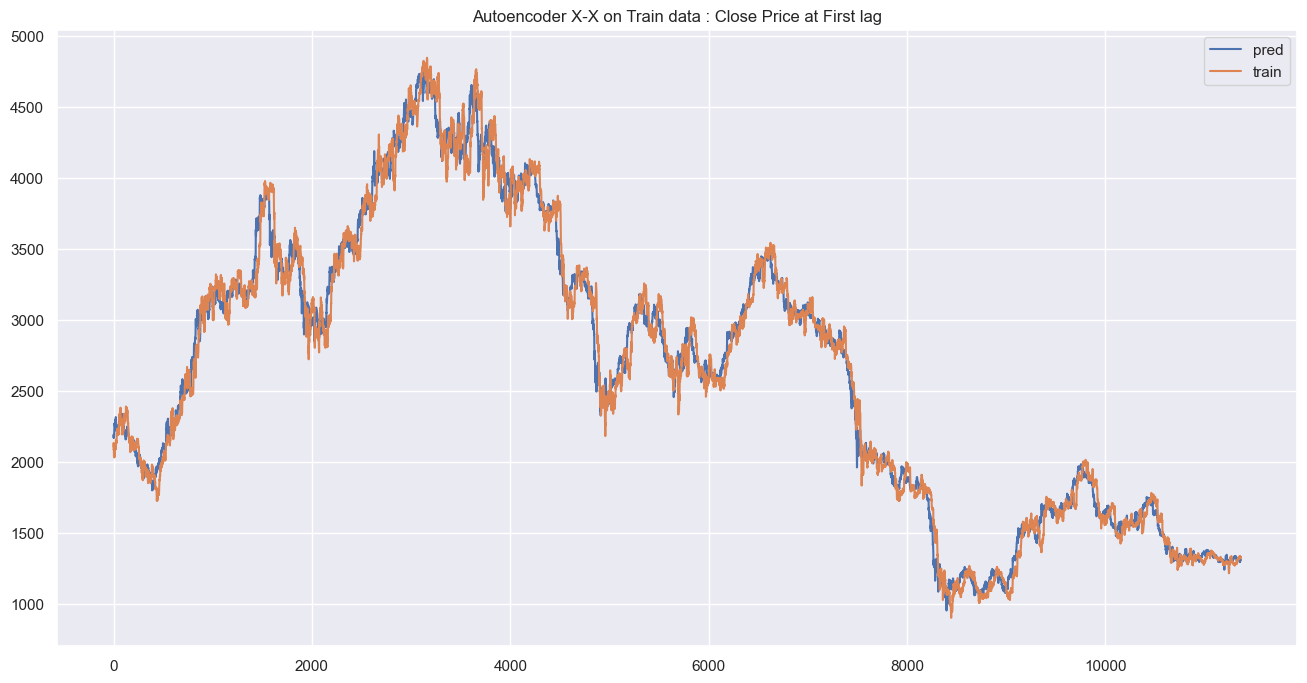

In [64]:
print(X_train_raw[:,0, 0])
print(X_train_pred[:,0, 0] * X_train_raw[:,-1, 0])

fig = plt.figure(figsize=(16, 8))
plt.title("Autoencoder X-X on Train data : Close Price at First lag")
plt.plot(X_train_pred[:,0, 0] * X_train_raw[:,-1, 0], label="pred")
plt.plot(X_train_raw[:,0,0], label="train")
plt.legend(loc='upper right')

#### on Test data

In [65]:
X_test_sca_pred = autoencoder.predict(X_test_sca)
X_test_sca_pred.shape

88/88 [==============================] - 3s 32ms/step


(2795, 48, 104)

In [66]:
df_feat["date_ETH"].iloc[TRAIN_SPLIT]

'2022-10-21 00:00:00'

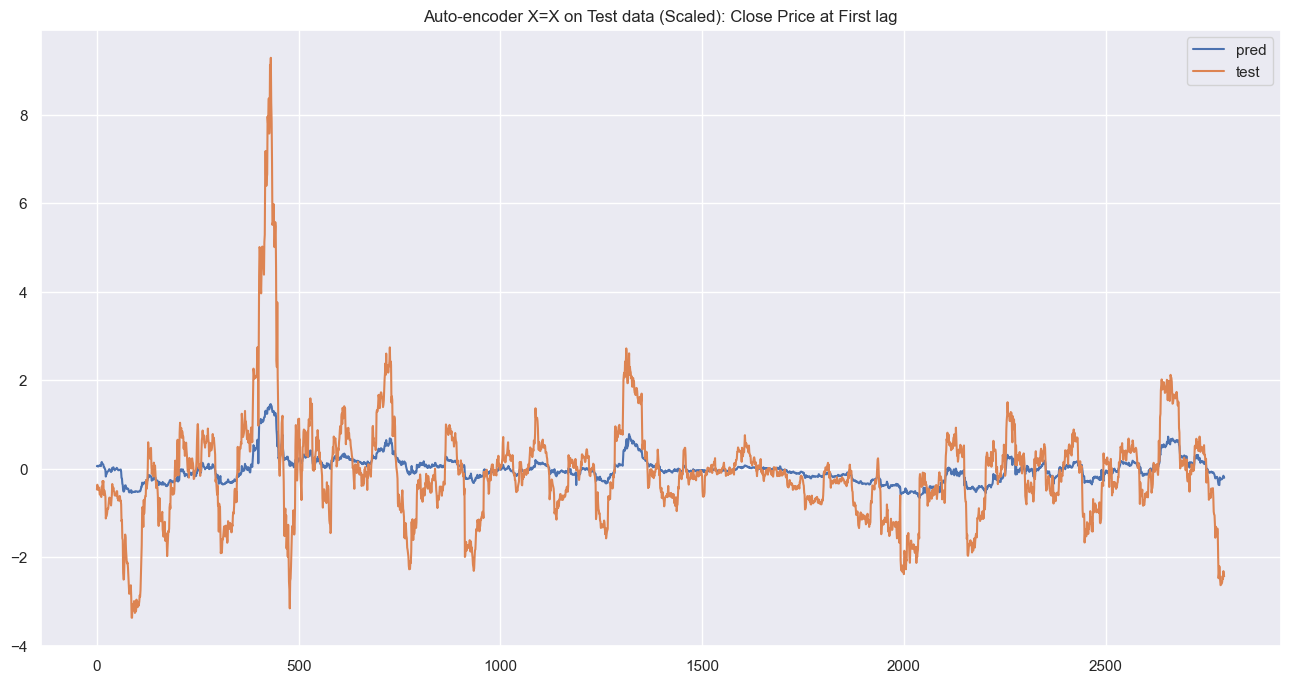

In [67]:
fig = plt.figure(figsize=(16, 8))
plt.title("Auto-encoder X=X on Test data (Scaled): Close Price at First lag")
plt.plot(X_test_sca_pred[:,0,0], label="pred")
plt.plot(X_test_sca[:,0,0], label="test")
plt.legend(loc='upper right')

In [68]:
# X  _raw : df feat raw data
# X : price normalized
# X  _sca : standardized use by model
# X      _pred : predict
X_test_pred = scaler.inverse_transform(X_test_sca_pred.reshape(-1,X_test_sca_pred.shape[-1])).reshape(X_test_sca_pred.shape)
print("X test raw  : ", X_test_raw[:,0, 0][:9])
print("X test pred : ", (X_test_pred[:,0,0] * X_test_raw[:,-1, 0])[:9])

X test raw  :  [1286.57 1289.79 1287.54 1288.28 1288.02 1285.44 1284.59 1278.12 1280.39]
X test pred :  [1317.44454659 1314.8675688  1317.98587068 1318.73096006 1315.78527655
 1314.95219464 1316.17275064 1316.86359512 1318.94830975]


[1286.57 1289.79 1287.54 ... 1511.92 1509.13 1507.7 ]
[1317.44454659 1314.8675688  1317.98587068 ... 1673.66689539 1677.46981592
 1674.9675174 ]


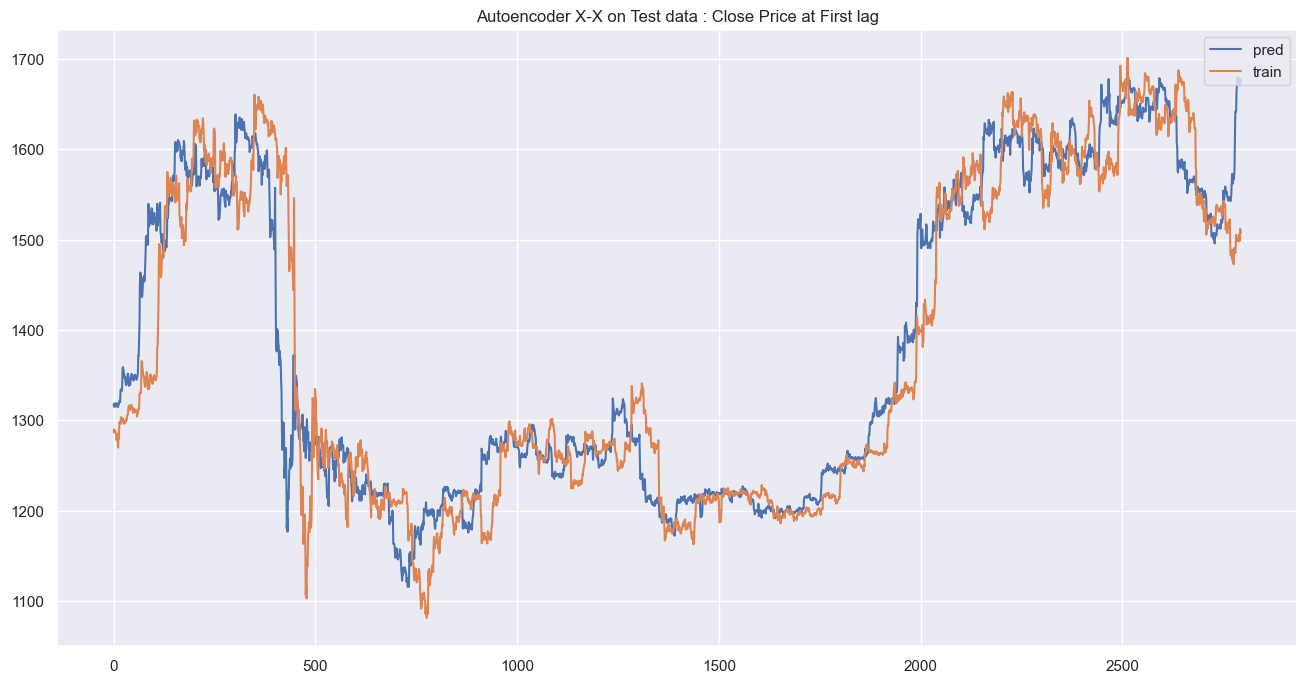

In [69]:
print(X_test_raw[:,0, 0])
print(X_test_pred[:,0, 0] * X_test_raw[:,-1, 0])

fig = plt.figure(figsize=(16, 8))
plt.title("Autoencoder X-X on Test data : Close Price at First lag")
plt.plot(X_test_pred[:,0, 0] * X_test_raw[:,-1, 0], label="pred")
plt.plot(X_test_raw[:,0,0], label="train")
plt.legend(loc='upper right')

In [70]:
encoder_model.layers[3].get_weights()

[]

## Prediction Model

### LSTM all features

In [74]:
X_train_sca.shape[-1]

104

In [75]:
X_train_sca.shape[-2:]

(48, 104)

In [76]:
NB_TRY = 50
BATCH_SIZE = 32
#STEPS_PER_EPOCH = math.ceil(BUFFER_SIZE / BATCH_SIZE)
EPOCHS = 100
patience = 10 
dropout_rate = 0.4
tf.keras.backend.clear_session()
# optimizer def 
#optim = tf.keras.optimizers.SGD(lr=lr, decay=decay, momentum=momentum, 
#                      nesterov=nesterov)
optim = tf.optimizers.Adam()
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                verbose=1, patience=patience,
                                restore_best_weights=True)
# create model
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(16, 
                    return_sequences=False,
                    input_shape=X_train_sca.shape[-2:]))
multi_step_model.add(tf.keras.layers.Dropout(0.2))
#multi_step_model.add(tf.keras.layers.BatchNormalization())
multi_step_model.add(tf.keras.layers.Dense(int(FUTURE_TARGET/STEP)))
# compile
multi_step_model.compile(optimizer=optim, loss='mse')
# fitting
'''multi_step_history = multi_step_model.fit(X_train_sca, 
                                        epochs=EPOCHS,
                                        steps_per_epoch=EVALUATION_INTERVAL,
                                        validation_data=val_data_multi,
                                        validation_steps=1,
                                        callbacks=[es],
                                        verbose=0)'''

multi_step_history = multi_step_model.fit(
    X_train_sca, y_train_sca, epochs=50, 
    batch_size=32, validation_data=(X_test_sca,y_test_sca), verbose=1, callbacks=[es])
# eval
mae_curr = np.min(multi_step_history.history['val_loss'])

Epoch 1/50


2023-02-19 21:36:13.296835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:36:13.469210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/356 [..............................] - ETA: 9:27 - loss: 0.8374

2023-02-19 21:36:13.961409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - ETA: 0s - loss: 0.7178

2023-02-19 21:36:20.984296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-19 21:36:21.044984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - 9s 22ms/step - loss: 0.7178 - val_loss: 0.4842
Epoch 2/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6978 - val_loss: 0.4854
Epoch 3/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6866 - val_loss: 0.4983
Epoch 4/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6698 - val_loss: 0.5256
Epoch 5/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6498 - val_loss: 0.5487
Epoch 6/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6273 - val_loss: 0.5463
Epoch 7/50
356/356 [==============================] - 7s 19ms/step - loss: 0.6126 - val_loss: 0.5708
Epoch 8/50
356/356 [==============================] - 7s 19ms/step - loss: 0.5967 - val_loss: 0.5688
Epoch 9/50
356/356 [==============================] - 7s 20ms/step - loss: 0.5850 - val_loss: 0.5742
Epoch 10/50
356/356 [==============================] - 7s 19ms/step - loss: 0.5742 - val_loss: 0.5737


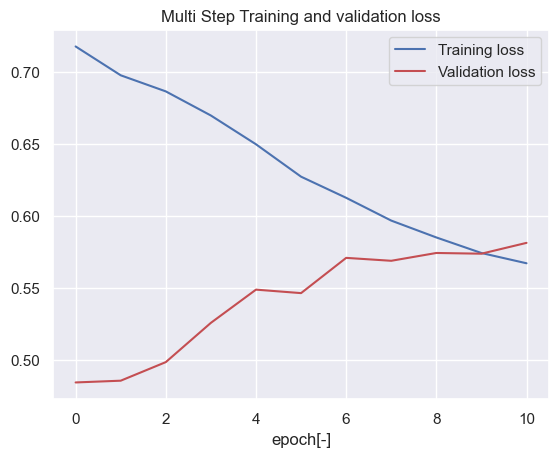

In [108]:
plot_train_history(multi_step_history,
                       'Multi Step Training and validation loss')

In [105]:
# _train_sca -> unscaler -> _train -> multiply by  Close price last lag
y_train_pred = multi_step_model.predict(X_train_sca)
y_train_pred_unscaled = scaler_y.inverse_transform(y_train_pred.reshape(-1,y_train_pred.shape[-1])).reshape(y_train_pred.shape)
y_train_pred_raw = y_train_pred_unscaled * X_train_raw[:,-1, 0][:, np.newaxis]

y_test_pred = multi_step_model.predict(X_test_sca)
y_test_pred_unscaled = scaler_y.inverse_transform(y_test_pred.reshape(-1,y_test_pred.shape[-1])).reshape(y_test_pred.shape)
y_test_pred_raw = y_test_pred_unscaled * X_test_raw[:,-1, 0][:, np.newaxis]

In [93]:
y_train_pred_raw.shape

(11366, 12)

In [92]:
y_train_raw.shape

(11366, 12)

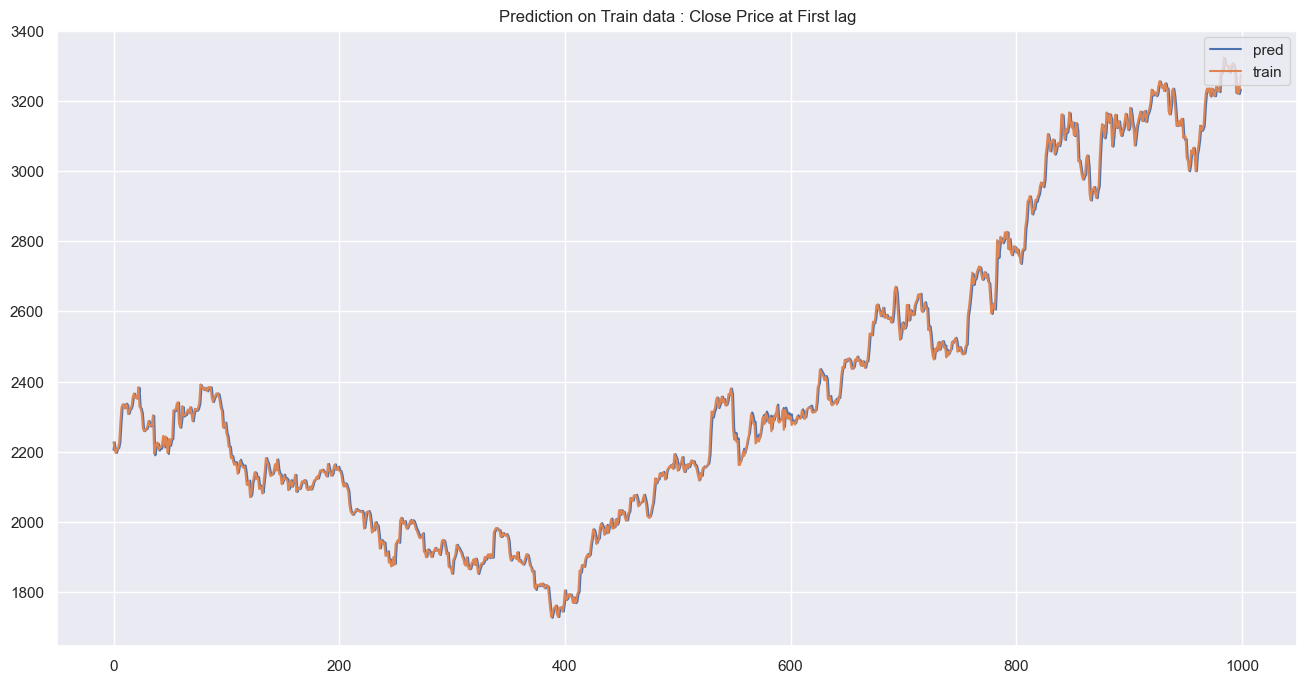

In [101]:
fig = plt.figure(figsize=(16, 8))
plt.title("Prediction on Train data : Close Price at First lag")
plt.plot(y_train_pred_raw[:1000,0], label="pred")
plt.plot(y_train_raw[:1000, 0], label="train")
plt.legend(loc='upper right')

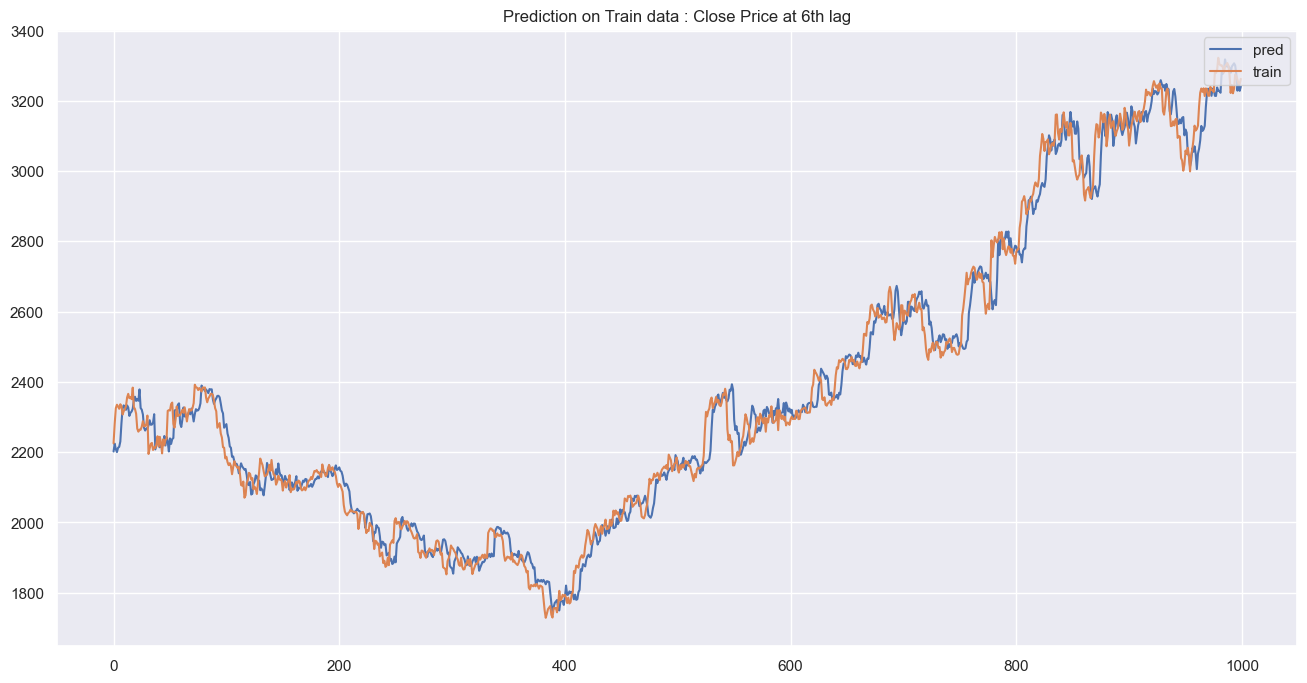

In [102]:
fig = plt.figure(figsize=(16, 8))
plt.title("Prediction on Train data : Close Price at 6th lag")
plt.plot(y_train_pred_raw[:1000, 5], label="pred")
plt.plot(y_train_raw[:1000, 5], label="train")
plt.legend(loc='upper right')

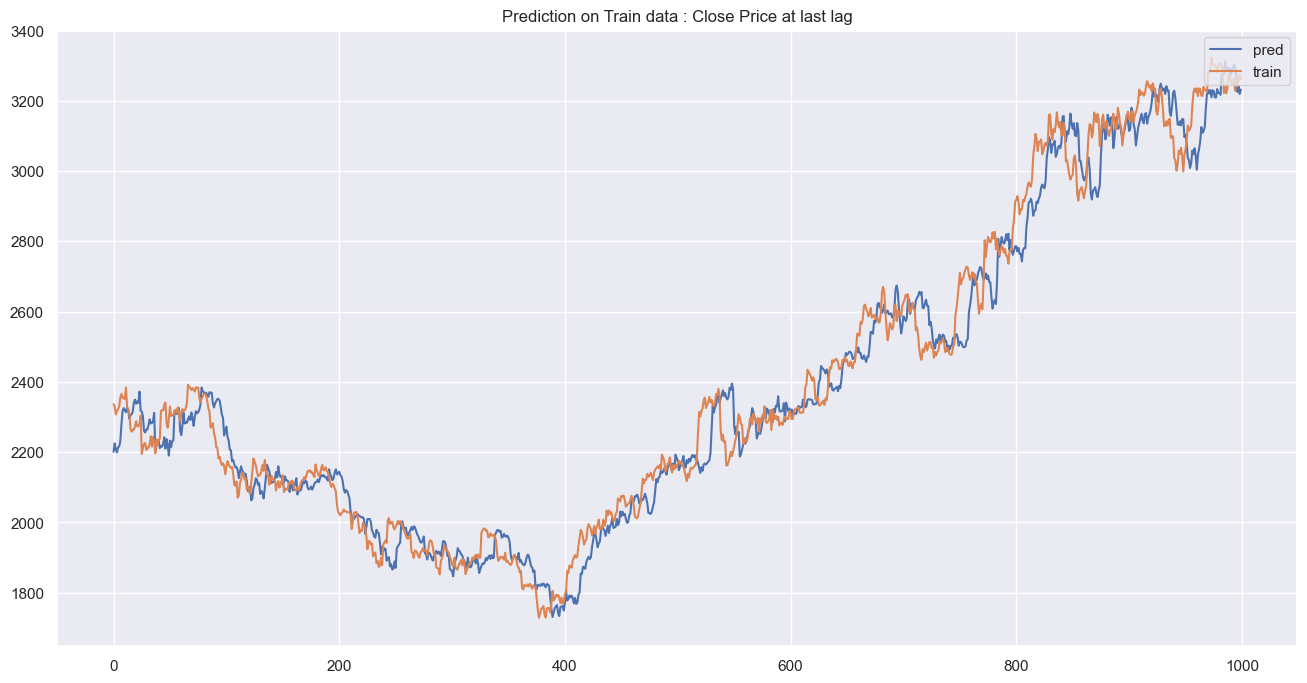

In [103]:
fig = plt.figure(figsize=(16, 8))
plt.title("Prediction on Train data : Close Price at last lag")
plt.plot(y_train_pred_raw[:1000, -1], label="pred")
plt.plot(y_train_raw[:1000, -1], label="train")
plt.legend(loc='upper right')

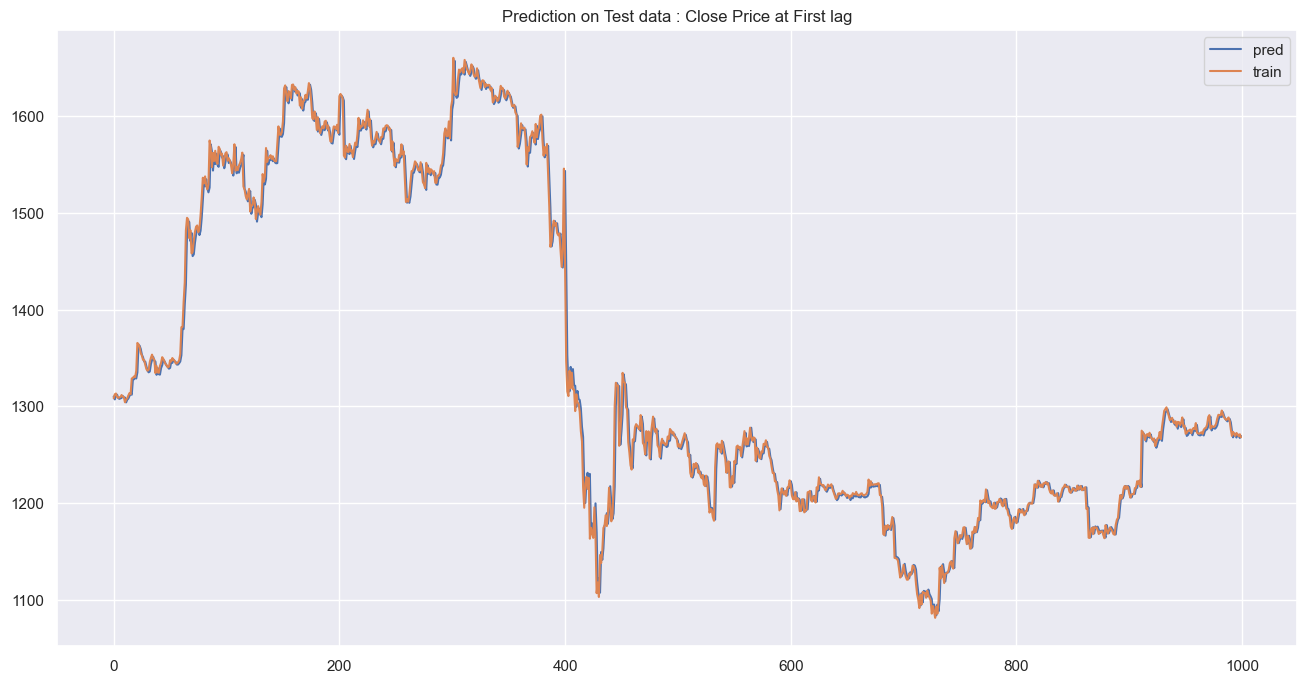

In [106]:
fig = plt.figure(figsize=(16, 8))
plt.title("Prediction on Test data : Close Price at First lag")
plt.plot(y_test_pred_raw[:1000,0], label="pred")
plt.plot(y_test_raw[:1000, 0], label="train")
plt.legend(loc='upper right')

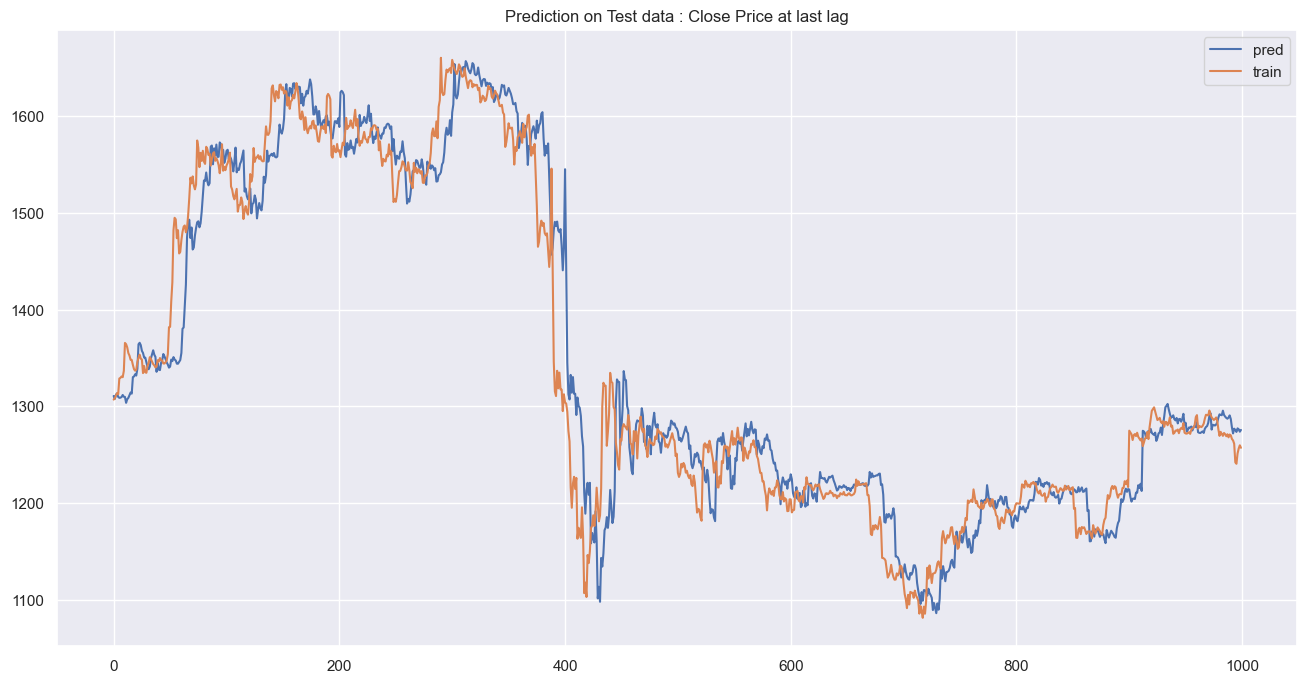

In [107]:
fig = plt.figure(figsize=(16, 8))
plt.title("Prediction on Test data : Close Price at last lag")
plt.plot(y_test_pred_raw[:1000,-1], label="pred")
plt.plot(y_test_raw[:1000, -1], label="train")
plt.legend(loc='upper right')

In [86]:
y_train_pred_unscaled[0,:]

array([1.0000563 , 1.0012318 , 1.0020348 , 0.999521  , 0.9990703 ,
       0.9982804 , 1.0016481 , 1.000126  , 1.0030038 , 0.999501  ,
       0.99809   , 0.99793434], dtype=float32)

In [90]:
y_train_pred_unscaled[0,:] * X_train_raw[0,-1, 0]

array([2205.784 , 2208.3767, 2210.148 , 2204.6035, 2203.6094, 2201.8672,
       2209.295 , 2205.9377, 2212.2854, 2204.5593, 2201.4473, 2201.1038],
      dtype=float32)

In [91]:
y_train_pred_raw[0,:]

array([2205.7841054 , 2208.37690902, 2210.14804027, 2204.60352652,
       2203.60936867, 2201.86716029, 2209.29507861, 2205.93792247,
       2212.2854402 , 2204.55935341, 2201.44725284, 2201.10385952])

### Autoencoder + LSTM reduced features

## Compare

In [71]:
str(time.time())

'1676838091.1706738'

## Save best prediction

In [109]:
X_test_sca.shape

(2795, 48, 104)

In [126]:
df_feat["Close_ETH"].iloc[-1]

1637.84

In [129]:
X_last_raw = df_feat[list_col_select].iloc[-PAST_HISTORY:].values[np.newaxis,:]
# divided price
X_last = X_last_raw / df_feat["Close_ETH"].iloc[-1]
# scaler
X_last_sca = scaler.transform(X_last.reshape(-1,X_last.shape[-1])).reshape(X_last.shape)
y_last_pred = multi_step_model.predict(X_last_sca)
y_last_pred_unscaled = scaler_y.inverse_transform(y_last_pred.reshape(-1,y_last_pred.shape[-1])).reshape(y_last_pred.shape)
y_last_pred_raw = y_last_pred_unscaled * df_feat["Close_ETH"].iloc[-1]
y_last_pred_raw

1/1 [==============================] - 0s 19ms/step


array([[1634.2122, 1647.3474, 1638.7083, 1640.8469, 1609.5161, 1645.6715,
        1627.5857, 1638.6956, 1633.8802, 1651.5802, 1610.8867, 1632.3556]],
      dtype=float32)

In [133]:
#file_name = "/tmp/pred_vals.csv"
nb_last_hour = 12
list_pred = y_last_pred_raw.squeeze()[-nb_last_hour:]
save_list(list_pred, path_save_pred_vals)